In [1]:
import pandas as pd
hr = pd.read_csv('cleaned.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['start_date', 'end_date', 'duration', 'division', 'department', 'jobtitle', 'comprate', 'work_location', 'work_address1', 'work_address2', 'work_city', 'work_state', 'work_postal', 'home_city', 'home_state', 'home_postal', 'sex', 'ethnicity', 'mar_status', 'highest_educ_lvl', 'age', 'classification', 'age_group', 'event', 'event_reason', 'tenure_group_by_department', 'tenure_group_by_division', 'deptartment_joiners', 'deptartment_leavers', 'division_joiners', 'division_leavers', 'sysdate', 'emplid_sec']

Sample data:


,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,...,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,...,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,...,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,...,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,...,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,...,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d


In [2]:
hr['division'].unique()

array(['Children Services', 'Adult Services', 'Administrative Services',
       'Other', 'Finance and Forecasting', 'Self Sufficiency',
       'Public Authority'], dtype=object)

In [3]:
hr_two = hr.copy()
hr_two = hr_two.drop(['start_date', 'end_date', 'duration', 'department', 'jobtitle', 'work_location', 'work_address1', 'work_address2', 'work_city', 'work_state', 'work_postal', 'home_city', 'home_state', 'home_postal', 'sex', 'ethnicity', 'mar_status', 'highest_educ_lvl', 'classification', 'age_group', 'event', 'event_reason', 'tenure_group_by_department', 'deptartment_joiners', 'deptartment_leavers', 'sysdate', 'emplid_sec'], axis=1)

In [4]:
hr_two = pd.get_dummies(hr_two, drop_first=True)

In [5]:
print(hr_two.shape)
hr_two.head()

(86561, 13)


,comprate,age,division_joiners,division_leavers,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,tenure_group_by_division_3_to_4,tenure_group_by_division_over_5,tenure_group_by_division_under_1
0,15,34.0,1,0,0,1,0,0,0,0,0,0,1
1,39,46.0,1,1,0,1,0,0,0,0,0,0,1
2,39,46.0,1,0,1,0,0,0,0,0,0,0,1
3,20,32.0,1,0,0,0,0,0,0,0,0,0,1
4,27,33.0,1,0,1,0,0,0,0,0,0,0,1


In [6]:
hr_two.columns.values

array(['comprate', 'age', 'division_joiners', 'division_leavers',
       'division_Adult Services', 'division_Children Services',
       'division_Finance and Forecasting', 'division_Other',
       'division_Public Authority', 'division_Self Sufficiency',
       'tenure_group_by_division_3_to_4',
       'tenure_group_by_division_over_5',
       'tenure_group_by_division_under_1'], dtype=object)

In [7]:
hr_two.isnull().any().any()

True

In [8]:
hr_two.dropna(how='all')
hr_two = hr_two.reset_index(drop = True)
hr_two

,comprate,age,division_joiners,division_leavers,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,tenure_group_by_division_3_to_4,tenure_group_by_division_over_5,tenure_group_by_division_under_1
0,15,34.0,1,0,0,1,0,0,0,0,0,0,1
1,39,46.0,1,1,0,1,0,0,0,0,0,0,1
2,39,46.0,1,0,1,0,0,0,0,0,0,0,1
3,20,32.0,1,0,0,0,0,0,0,0,0,0,1
4,27,33.0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86556,32,55.0,0,1,0,0,0,0,0,1,0,1,0
86557,11,NaN,1,1,0,0,0,0,0,1,0,0,0
86558,13,NaN,1,0,0,0,0,1,0,0,0,0,0
86559,15,NaN,0,0,0,0,0,1,0,0,0,1,0


In [9]:
hr_two["age"].isnull().sum()

11518

In [10]:
hr_two = hr_two.dropna()
print(hr_two)

       comprate   age  division_joiners  division_leavers  \
0            15  34.0                 1                 0   
1            39  46.0                 1                 1   
2            39  46.0                 1                 0   
3            20  32.0                 1                 0   
4            27  33.0                 1                 0   
...         ...   ...               ...               ...   
86552        25  47.0                 0                 0   
86553        27  49.0                 0                 0   
86554        31  52.0                 0                 0   
86555        32  54.0                 0                 0   
86556        32  55.0                 0                 1   

       division_Adult Services  division_Children Services  \
0                            0                           1   
1                            0                           1   
2                            1                           0   
3                  

In [11]:
hr_vars=hr_two.columns.values.tolist()
y=['division_leavers']
X=[i for i in hr_vars if i not in y]
cols=['comprate'] 
X=hr_two[cols]
y=hr_two['division_leavers']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.839


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.840


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     18879
           1       0.61      0.03      0.05      3634

    accuracy                           0.84     22513
   macro avg       0.73      0.51      0.48     22513
weighted avg       0.80      0.84      0.77     22513



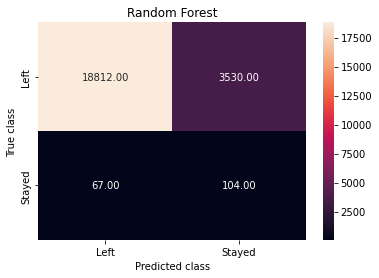

In [19]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [20]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     18879
           1       0.00      0.00      0.00      3634

    accuracy                           0.84     22513
   macro avg       0.42      0.50      0.46     22513
weighted avg       0.70      0.84      0.76     22513



c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0.5, 1.0, 'Logistic Regression')

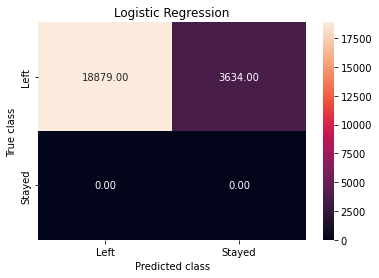

In [21]:
import matplotlib
import matplotlib.pyplot as plt
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

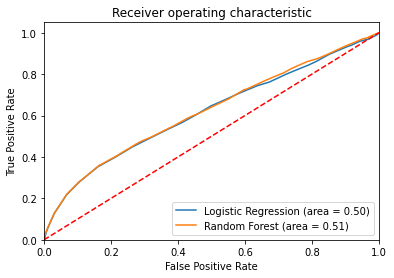

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()